# Neural network loss metric comparison
This notebook compares performance between the Mean Squared Error and Mean Absolute Error loss metrics.

In [1]:
# %load 3_mae_mse_comp.py
import src.core as mlModule
import src.core_configs as configs

Using TensorFlow backend.


In [2]:
def initTrainPredict(modelList, retrain=False, plot=True, interpol=False):
    # 4. Initiate and train models
    mlModule.initModels(modelList)
    mlModule.trainModels(retrain)
    
    # 5. Predict
    modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlModule.predictWithModels(
        plot=plot,
        interpol=interpol,
    )

In [3]:
def pred(facility, model, resolution):
    filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfig(facility, model, resolution)

    df = mlModule.initDataframe(filename, columns, irrelevantColumns)
    df_train, df_test = mlModule.getTestTrainSplit(traintime, testtime)
    X_train, y_train, X_test, y_test = mlModule.getFeatureTargetSplit(targetColumns)

    mlp_mae = mlModule.MLP('MLP 1x128 d0.2 mae mod'+model, layers=[128], dropout=0.2, loss='mean_absolute_error', metrics=['mean_absolute_error'])
    mlp_mse = mlModule.MLP('MLP 1x128 d0.2 mse mod'+model, layers=[128], dropout=0.2, loss='mean_squared_error', metrics=['mean_squared_error'])
    lstm_mae = mlModule.LSTM('LSTM 1x128 d0.2 mae mod'+model, layers=[128], dropout=0.2, recurrentDropout=0.2, enrolWindow=12, loss='mean_absolute_error', metrics=['mean_absolute_error'])
    lstm_mse = mlModule.LSTM('LSTM 1x128 d0.2 mse mod'+model, layers=[128], dropout=0.2, recurrentDropout=0.2, enrolWindow=12, loss='mean_squared_error', metrics=['mean_squared_error'])
    
    modelList = [
        mlp_mae,
        mlp_mse,
        lstm_mae,
        lstm_mse,
    ]

    initTrainPredict(modelList)

# Dataset D, predictive model A

Columns before removal: 
Col. 0 : 20TT001 - Process Inlet Temperature
Col. 1 : 20PT001 - Process Inlet Pressure
Col. 2 : 20FT001 - Process Flow Rate
Col. 3 : 20TT002 - Process Outlet Temperature
Col. 4 : 20PDT001 - Process Pressure Difference
Col. 5 : 50TT001 - Coolant Inlet Temperature
Col. 6 : 50PT001 - Coolant Inlet Pressure
Col. 7 : 50FT001 - Coolant Flow Rate
Col. 8 : 50TT002 - Coolant Outlet Temperature
Col. 9 : 50PDT001 - Coolant Pressure Difference
Col. 10 : 50TV001 - Coolant Valve Opening

Columns after removal: 
Col. 0 : 20TT001 - Process Inlet Temperature
Col. 1 : 20FT001 - Process Flow Rate
Col. 2 : 20TT002 - Process Outlet Temperature
Col. 3 : 50TT001 - Coolant Inlet Temperature
Col. 4 : 50TT002 - Coolant Outlet Temperature

Finding data between 2020-01-01 00:00:00 and 2020-03-20 00:00:00
Found 315 rows

Finding data between 2020-01-01 00:00:00 and 2020-08-01 00:00:00
Found 726 rows

Model MLP 1x128 d0.2 mae modA was loaded from file
Model MLP 1x128 d0.2 mse modA was loade

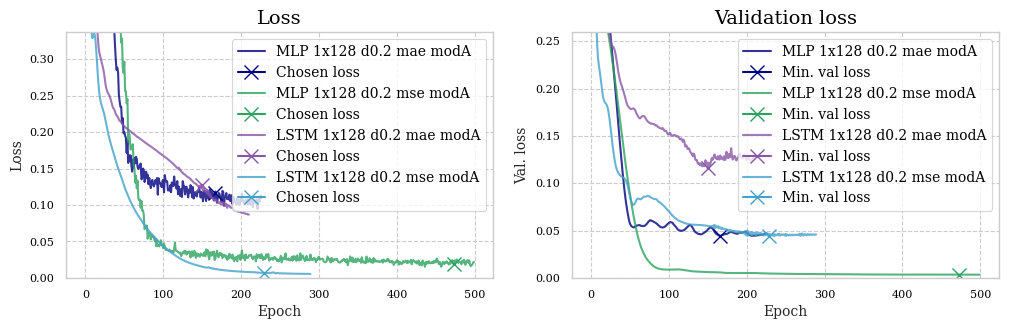

Model prediction scores
+--------------------------+-------------+------------+
|          Model           | Train score | Test score |
+--------------------------+-------------+------------+
| MLP 1x128 d0.2 mae modA  |    0.9973   |   0.8491   |
| MLP 1x128 d0.2 mse modA  |    0.997    |   0.8073   |
| LSTM 1x128 d0.2 mae modA |    0.9444   |   0.4601   |
| LSTM 1x128 d0.2 mse modA |    0.9854   |  -1.6922   |
+--------------------------+-------------+------------+


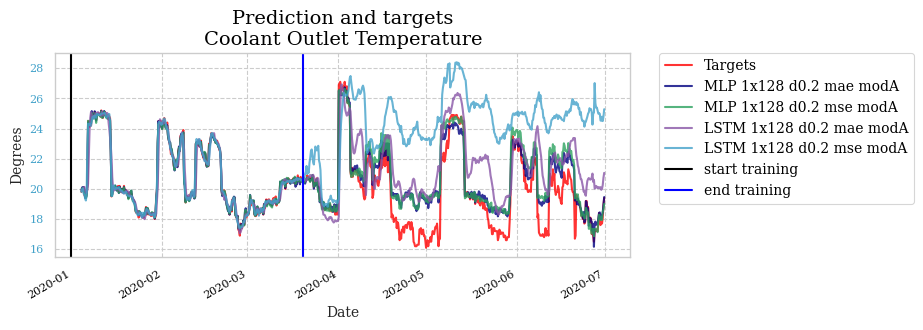

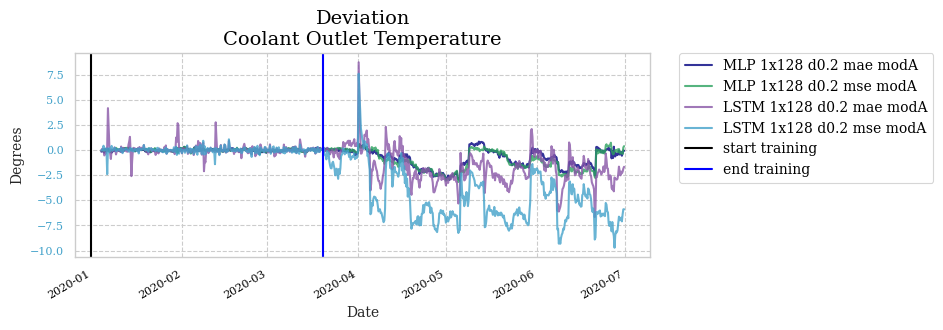

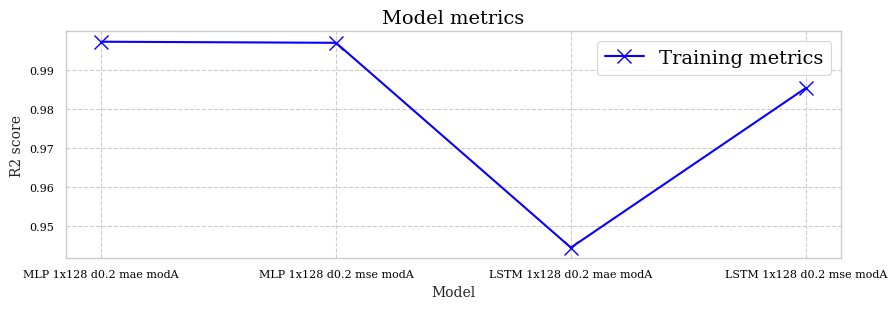

In [4]:
pred('D', 'A', '30min')

In [5]:
mlModule.reset()

# Dataset D, predictive model B

Columns before removal: 
Col. 0 : 20TT001 - Process Inlet Temperature
Col. 1 : 20PT001 - Process Inlet Pressure
Col. 2 : 20FT001 - Process Flow Rate
Col. 3 : 20TT002 - Process Outlet Temperature
Col. 4 : 20PDT001 - Process Pressure Difference
Col. 5 : 50TT001 - Coolant Inlet Temperature
Col. 6 : 50PT001 - Coolant Inlet Pressure
Col. 7 : 50FT001 - Coolant Flow Rate
Col. 8 : 50TT002 - Coolant Outlet Temperature
Col. 9 : 50PDT001 - Coolant Pressure Difference
Col. 10 : 50TV001 - Coolant Valve Opening

Columns after removal: 
Col. 0 : 20TT001 - Process Inlet Temperature
Col. 1 : 20FT001 - Process Flow Rate
Col. 2 : 20TT002 - Process Outlet Temperature
Col. 3 : 50TT001 - Coolant Inlet Temperature
Col. 4 : 50TT002 - Coolant Outlet Temperature
Col. 5 : 50TV001 - Coolant Valve Opening

Finding data between 2020-01-01 00:00:00 and 2020-03-20 00:00:00
Found 315 rows

Finding data between 2020-01-01 00:00:00 and 2020-08-01 00:00:00
Found 726 rows

Model MLP 1x128 d0.2 mae modB was loaded from fil

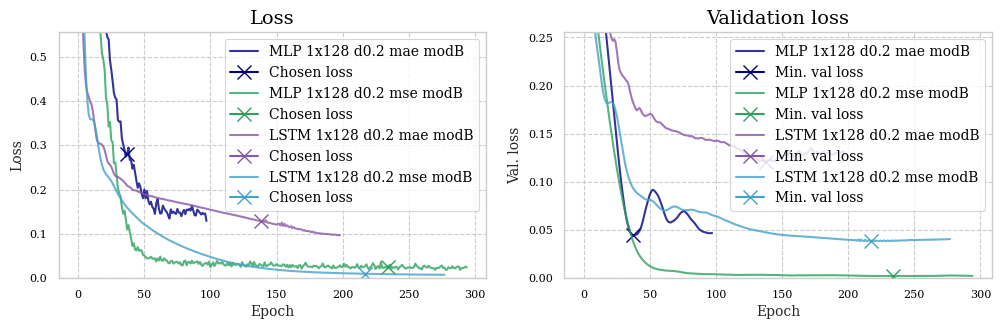

Model prediction scores
+--------------------------+-------------+------------+
|          Model           | Train score | Test score |
+--------------------------+-------------+------------+
| MLP 1x128 d0.2 mae modB  |    0.9029   |   0.7258   |
| MLP 1x128 d0.2 mse modB  |    0.998    |   0.9411   |
| LSTM 1x128 d0.2 mae modB |    0.935    |   0.8433   |
| LSTM 1x128 d0.2 mse modB |    0.9847   |  -0.8088   |
+--------------------------+-------------+------------+


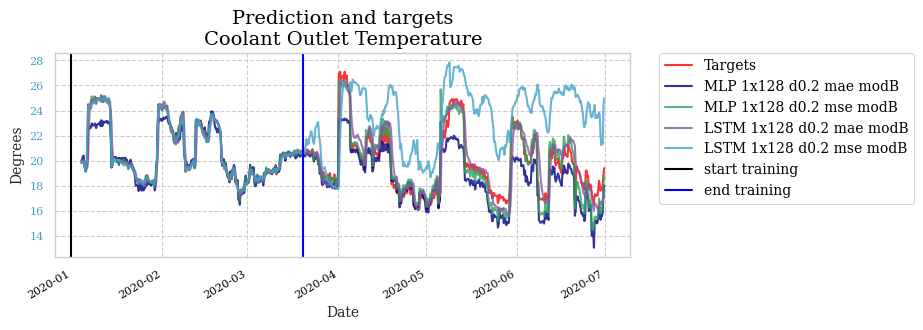

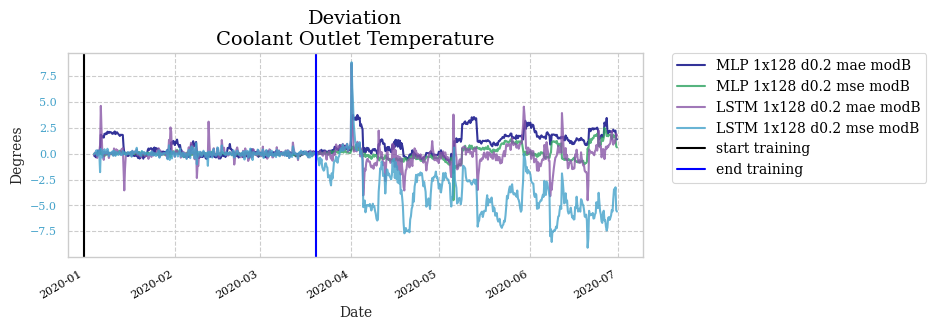

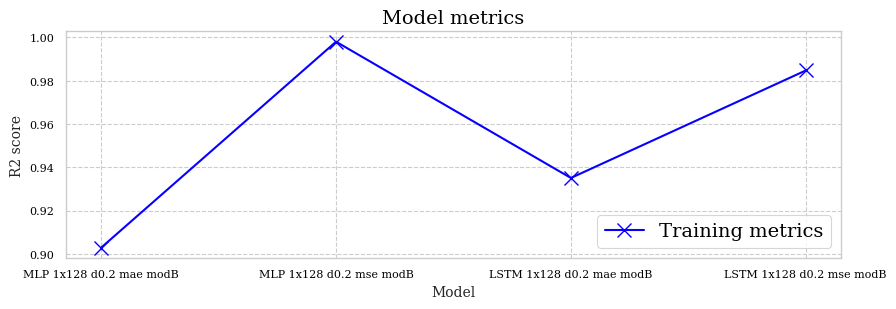

In [6]:
pred('D', 'B', '30min')

In [7]:
mlModule.reset()

# Dataset F, predictive model A, 30min

Columns before removal: 
Col. 0 : FYN0111 - Process Flow Rate
Col. 1 : TT0102_MA_Y - Process Inlet Temperature A
Col. 2 : TIC0101_CA_YX - Process Outlet Temperature A
Col. 3 : TT0104_MA_Y - Process Inlet Temperature B
Col. 4 : TIC0103_CA_YX - Process Outlet Temperature B
Col. 5 : TT0106_MA_Y - Process Inlet Temperature C
Col. 6 : TIC0105_CA_YX - Process Outlet Temperature C
Col. 7 : PDT0108_MA_Y - Process A Pressure Difference
Col. 8 : PDT0119_MA_Y - Process B Pressure Difference
Col. 9 : PDT0118_MA_Y - Process C Pressure Difference
Col. 10 : PIC0104_CA_YX - Separator Inlet Pressure
Col. 11 : TIC0425_CA_YX - Coolant Inlet Temperature
Col. 12 : TT0651_MA_Y - Coolant Outlet Temperature A
Col. 13 : TT0652_MA_Y - Coolant Outlet Temperature B
Col. 14 : TT0653_MA_Y - Coolant Outlet Temperature C
Col. 15 : TIC0101_CA_Y - Coolant Valve Opening A
Col. 16 : TIC0103_CA_Y - Coolant Valve Opening B
Col. 17 : TIC0105_CA_Y - Coolant Valve Opening C

Columns after removal: 
Col. 0 : FYN0111 - Process 

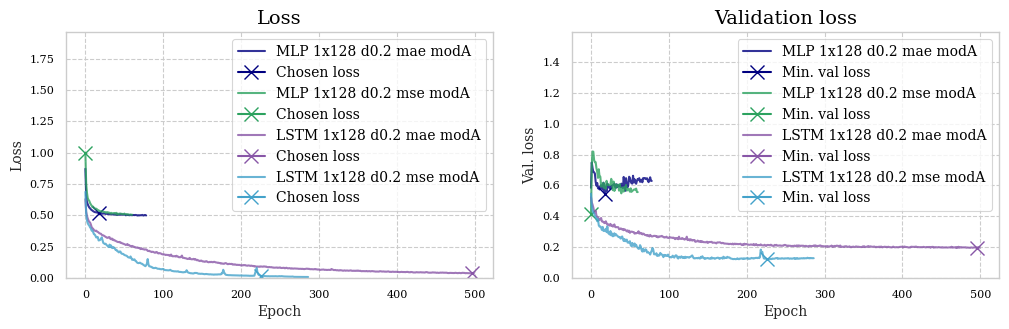

Model prediction scores
+--------------------------+-------------+------------+
|          Model           | Train score | Test score |
+--------------------------+-------------+------------+
| MLP 1x128 d0.2 mae modA  |    0.443    |   0.0534   |
| MLP 1x128 d0.2 mse modA  |    0.2869   |   0.2769   |
| LSTM 1x128 d0.2 mae modA |    0.9683   |  -0.5107   |
| LSTM 1x128 d0.2 mse modA |    0.9654   |  -0.6707   |
+--------------------------+-------------+------------+


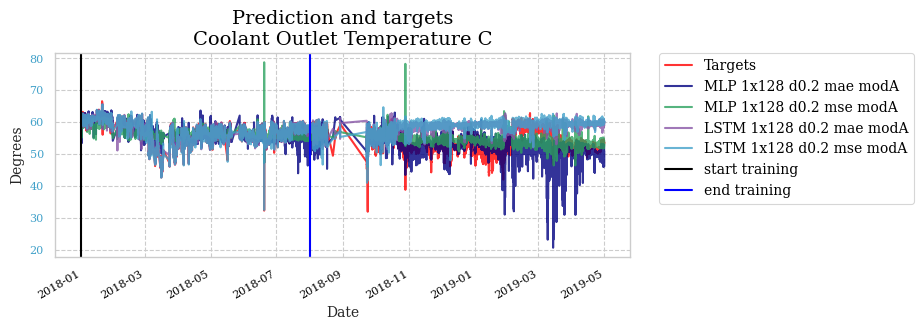

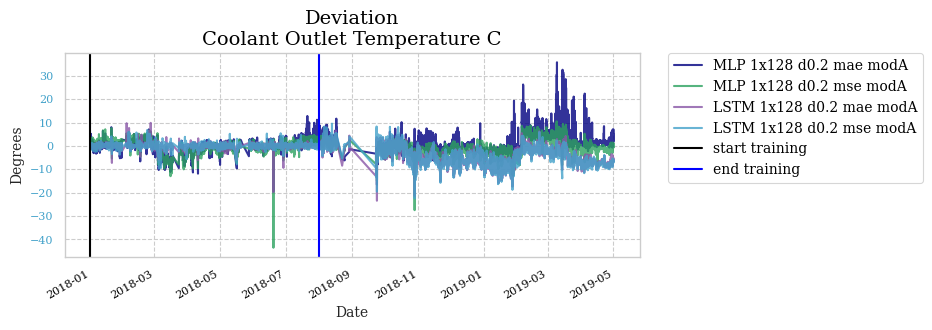

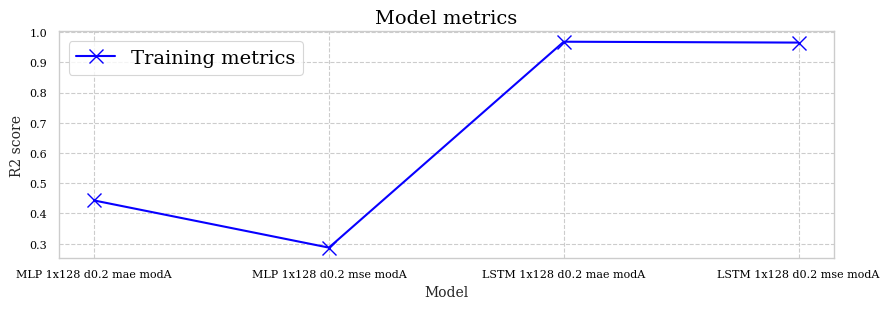

In [8]:
pred('F', 'A', '30min')

In [9]:
mlModule.reset()

# Dataset D, predictive model B, 30min

Columns before removal: 
Col. 0 : FYN0111 - Process Flow Rate
Col. 1 : TT0102_MA_Y - Process Inlet Temperature A
Col. 2 : TIC0101_CA_YX - Process Outlet Temperature A
Col. 3 : TT0104_MA_Y - Process Inlet Temperature B
Col. 4 : TIC0103_CA_YX - Process Outlet Temperature B
Col. 5 : TT0106_MA_Y - Process Inlet Temperature C
Col. 6 : TIC0105_CA_YX - Process Outlet Temperature C
Col. 7 : PDT0108_MA_Y - Process A Pressure Difference
Col. 8 : PDT0119_MA_Y - Process B Pressure Difference
Col. 9 : PDT0118_MA_Y - Process C Pressure Difference
Col. 10 : PIC0104_CA_YX - Separator Inlet Pressure
Col. 11 : TIC0425_CA_YX - Coolant Inlet Temperature
Col. 12 : TT0651_MA_Y - Coolant Outlet Temperature A
Col. 13 : TT0652_MA_Y - Coolant Outlet Temperature B
Col. 14 : TT0653_MA_Y - Coolant Outlet Temperature C
Col. 15 : TIC0101_CA_Y - Coolant Valve Opening A
Col. 16 : TIC0103_CA_Y - Coolant Valve Opening B
Col. 17 : TIC0105_CA_Y - Coolant Valve Opening C

Columns after removal: 
Col. 0 : FYN0111 - Process 

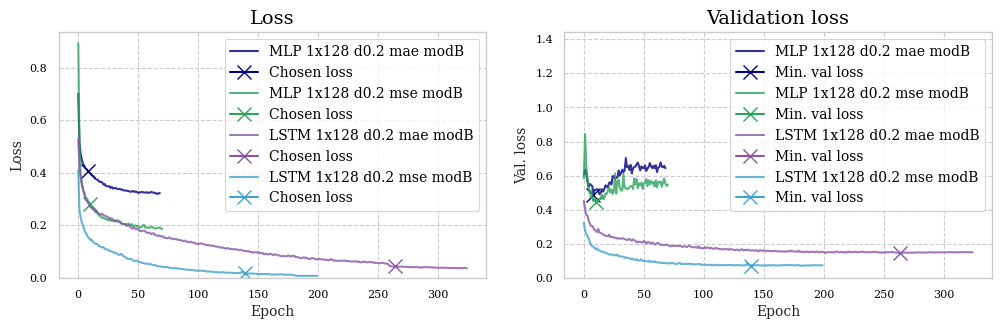

Model prediction scores
+--------------------------+-------------+------------+
|          Model           | Train score | Test score |
+--------------------------+-------------+------------+
| MLP 1x128 d0.2 mae modB  |    0.7019   |   0.5483   |
| MLP 1x128 d0.2 mse modB  |    0.7116   |   0.3472   |
| LSTM 1x128 d0.2 mae modB |    0.9743   |  -0.3665   |
| LSTM 1x128 d0.2 mse modB |    0.974    |  -0.5121   |
+--------------------------+-------------+------------+


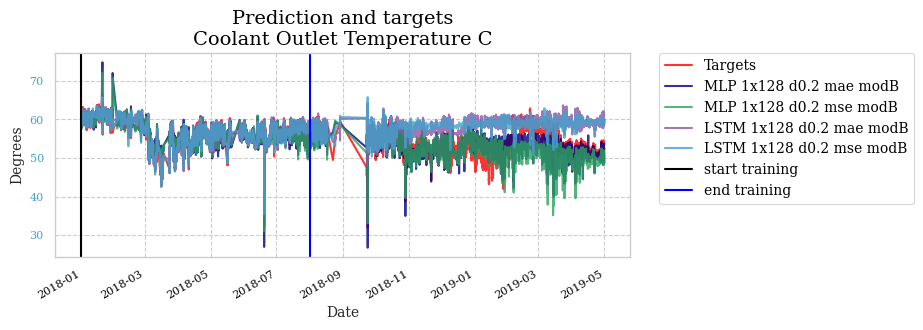

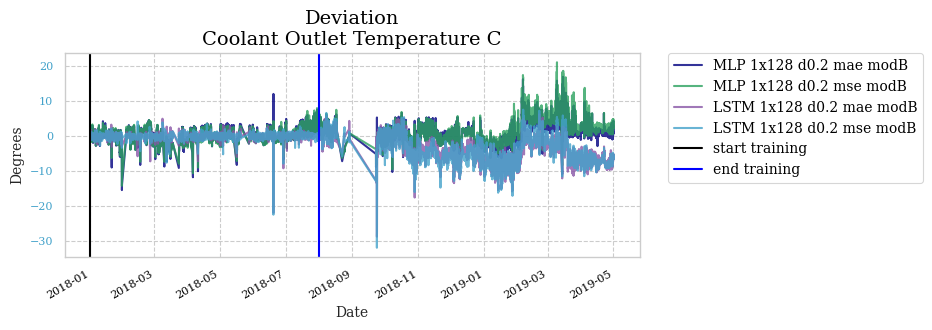

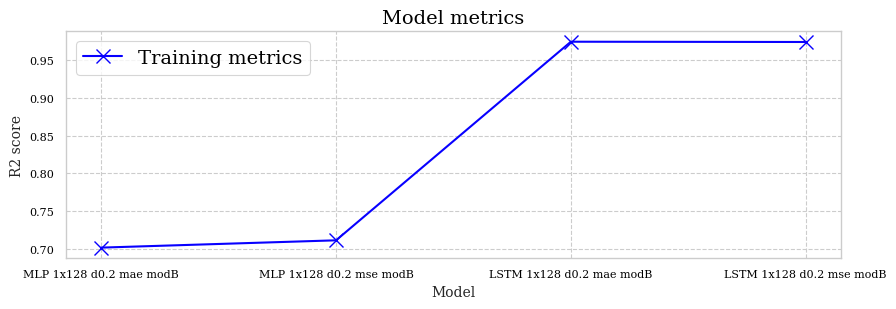

In [10]:
pred('F', 'B', '30min')

In [11]:
mlModule.reset()

# Dataset G, predictive model A, 30min

Columns before removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature
Col. 6 : PI0001 - Coolant Inlet Pressure
Col. 7 : FI0027 - Coolant Flow Rate
Col. 8 : TIC0022U - Coolant Valve Opening
Col. 9 : PDT0024 - Coolant Pressure Difference

Columns after removal: 
Col. 0 : TI0066 - Process Outlet Temperature
Col. 1 : TZI0012 - Process Inlet Temperature
Col. 2 : FI0010 - Process Flow Rate
Col. 3 : TT0025 - Coolant Inlet Temperature
Col. 4 : TT0026 - Coolant Outlet Temperature

Finding data between 2019-04-24 00:00:00 and 2019-08-01 00:00:00
Found 4232 rows

Finding data between 2017-01-01 00:00:00 and 2020-03-01 00:00:00
Found 49290 rows

Model MLP 1x128 d0.2 mae modA was loaded from file
Model MLP 1x128 d0.2 mse modA was loaded from file
Model LSTM 1x128 d0.2 mae modA was load

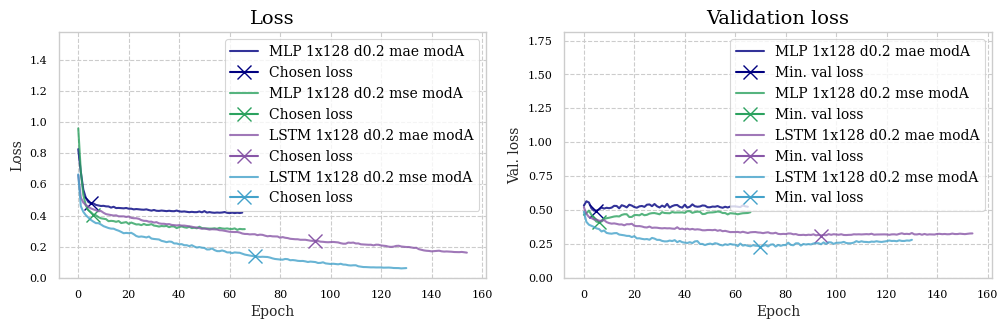

Model prediction scores
+--------------------------+-------------+------------+
|          Model           | Train score | Test score |
+--------------------------+-------------+------------+
| MLP 1x128 d0.2 mae modA  |    0.606    |  -0.9686   |
| MLP 1x128 d0.2 mse modA  |    0.612    |  -0.9642   |
| LSTM 1x128 d0.2 mae modA |    0.8452   |  -1.3476   |
| LSTM 1x128 d0.2 mse modA |    0.8504   |  -1.1556   |
+--------------------------+-------------+------------+


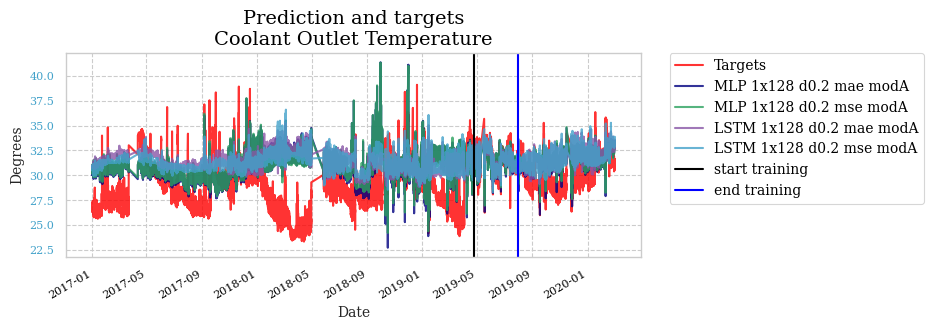

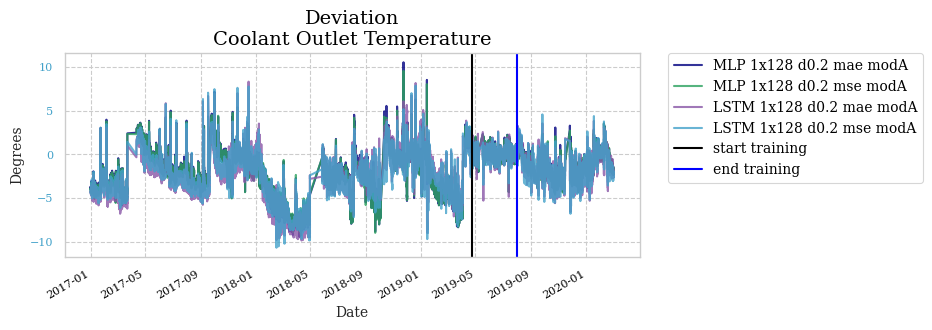

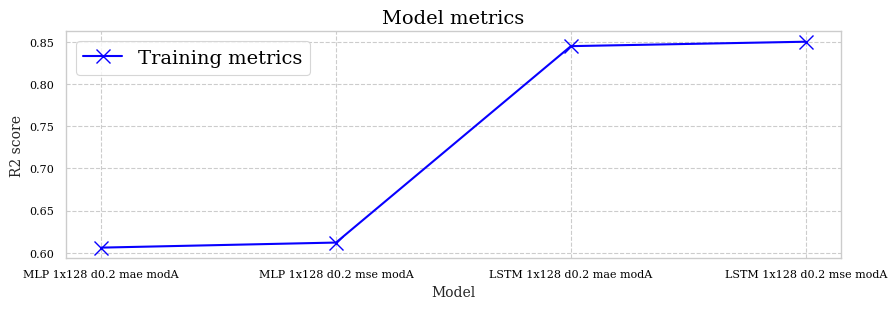

In [12]:
pred('G', 'A', '30min')

In [13]:
mlModule.reset()

# Dataset G, predictive model B, 30min

Columns before removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature
Col. 6 : PI0001 - Coolant Inlet Pressure
Col. 7 : FI0027 - Coolant Flow Rate
Col. 8 : TIC0022U - Coolant Valve Opening
Col. 9 : PDT0024 - Coolant Pressure Difference

Columns after removal: 
Col. 0 : TI0066 - Process Outlet Temperature
Col. 1 : TZI0012 - Process Inlet Temperature
Col. 2 : FI0010 - Process Flow Rate
Col. 3 : TT0025 - Coolant Inlet Temperature
Col. 4 : TT0026 - Coolant Outlet Temperature
Col. 5 : TIC0022U - Coolant Valve Opening

Finding data between 2019-04-24 00:00:00 and 2019-08-01 00:00:00
Found 4232 rows

Finding data between 2017-01-01 00:00:00 and 2020-03-01 00:00:00
Found 49290 rows

Model MLP 1x128 d0.2 mae modB was loaded from file
Model MLP 1x128 d0.2 mse modB was loaded from fi

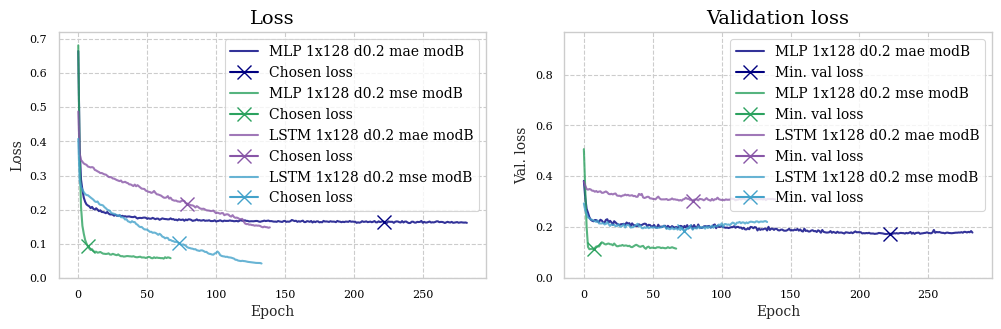

Model prediction scores
+--------------------------+-------------+------------+
|          Model           | Train score | Test score |
+--------------------------+-------------+------------+
| MLP 1x128 d0.2 mae modB  |    0.9523   |  -1.8221   |
| MLP 1x128 d0.2 mse modB  |    0.9287   |  -1.5307   |
| LSTM 1x128 d0.2 mae modB |    0.8559   |  -0.3603   |
| LSTM 1x128 d0.2 mse modB |    0.8867   |   -0.131   |
+--------------------------+-------------+------------+


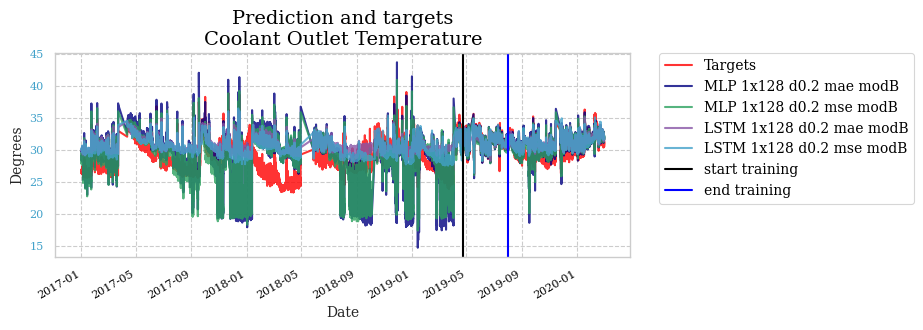

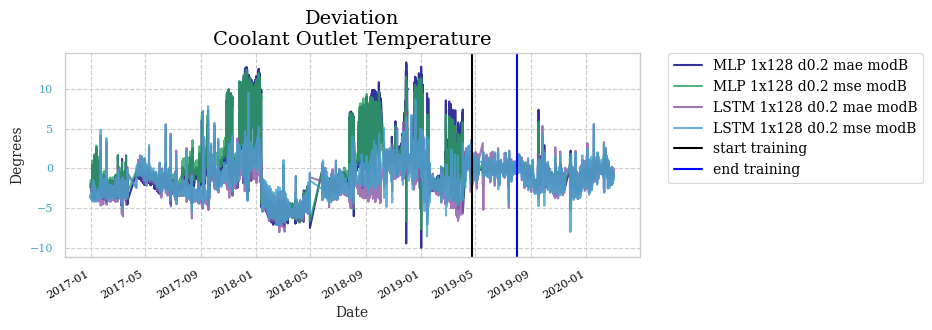

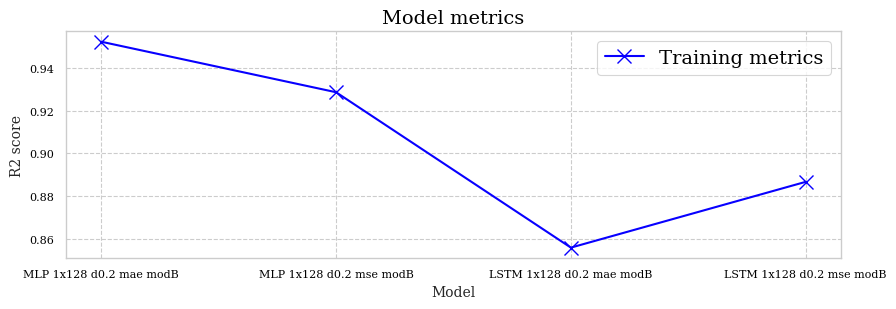

In [14]:
pred('G', 'B', '30min')

In [15]:
mlModule.reset()

# Conclusions
Be reminded that the MAE and MSE loss values cannot be compared directly. Because MLP and LSTM model were found to have poor performance for facility D, less emphasis is placed on these scores. However, note that MSE generally outperforms MAE for this dataset, particularly when using predictive model B. A likely cause is that dataset D contains no outliers, for which squared error metrics typically perform well. For facility F, a substantial increase in performance is found wen using MAE for predictive model A with MLP models. Recall that dataset F has considerable outliers for process flow rate measurements. The difference is very small for the remaining models, indicating that using more advanced architectures or the addition of more features may nullify the difference between absolute and squared metrics. For facility G, the performance is once more quite similar,

Similar behaviour is found for the trained models using each of the loss metrics, with a notable exception for the MLP models of facility F. The MLP model with MSE fails to improve from its initial validation loss. The appearance of the convergence graph, with drastically lower validation loss in the first epoch, makes it likely that the first validation split has achieved an artificially low loss score. Even so, the following iterations fail to find validation loss lower than that of the MAE model. For low loss values, the mean squared metric should be considerably lower than the absolute metric, as is seen for the remaining facilities and models. Therefore, the MLP model using MSE for facility F is unlikely to outperform the model using MAE, even with a more appropriate initial validation split.

It is concluded that absolute metrics are more suitable than squared metrics. The use of MAE is likely to cause less issues with regards to outliers, while providing acceptable performance. Using several loss metrics during model evaluation is not advised, as comparisons between trained models becomes challenging.